In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
!kaggle datasets download -d shivamb/vehicle-claim-fraud-detection

  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 69.2MB/s]


In [ ]:
!mkdir dataset

In [ ]:
!unzip vehicle-claim-fraud-detection.zip -d dataset

Archive:  vehicle-claim-fraud-detection.zip
  inflating: dataset/fraud_oracle.csv  


**Note:** I got some help from the following notebooks (specially to perform EDA on data and encoding):

https://www.kaggle.com/code/francescodemo5/vehicle-insurance-classification

https://www.kaggle.com/code/francescodemo5/vehicle-insurance-eda

https://www.kaggle.com/code/faridrizqis/claim-fraud-detection-xgb-lgbm-dt-rf

# EDA, a bit of cleaning and Encoding categorical data

In [ ]:
df = pd.read_csv('/content/dataset/fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

The data set has no null/missing values.

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


Min of age is zero! Which means there are obviusly data entry mistakes.

In [ ]:
df['FraudFound_P']

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

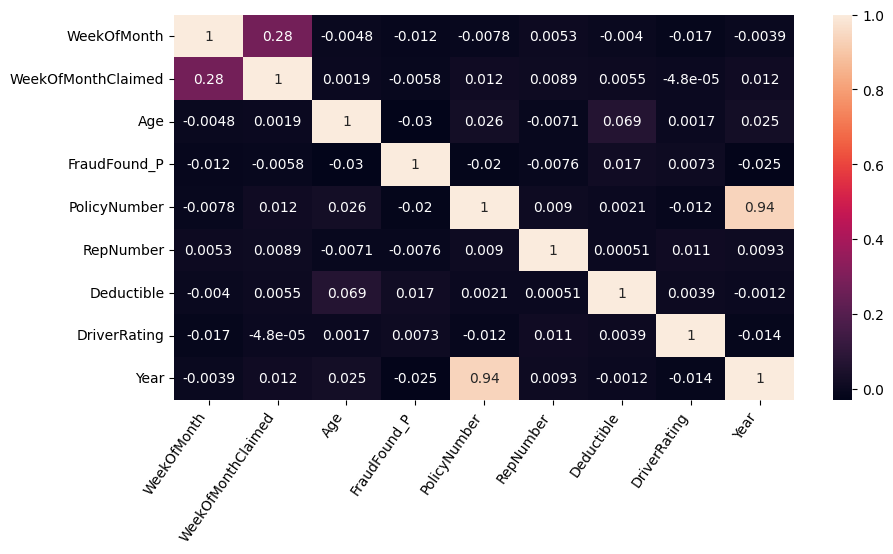

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation = 55, horizontalalignment='right')
plt.show()

Histogram(Distribution of numerical data):

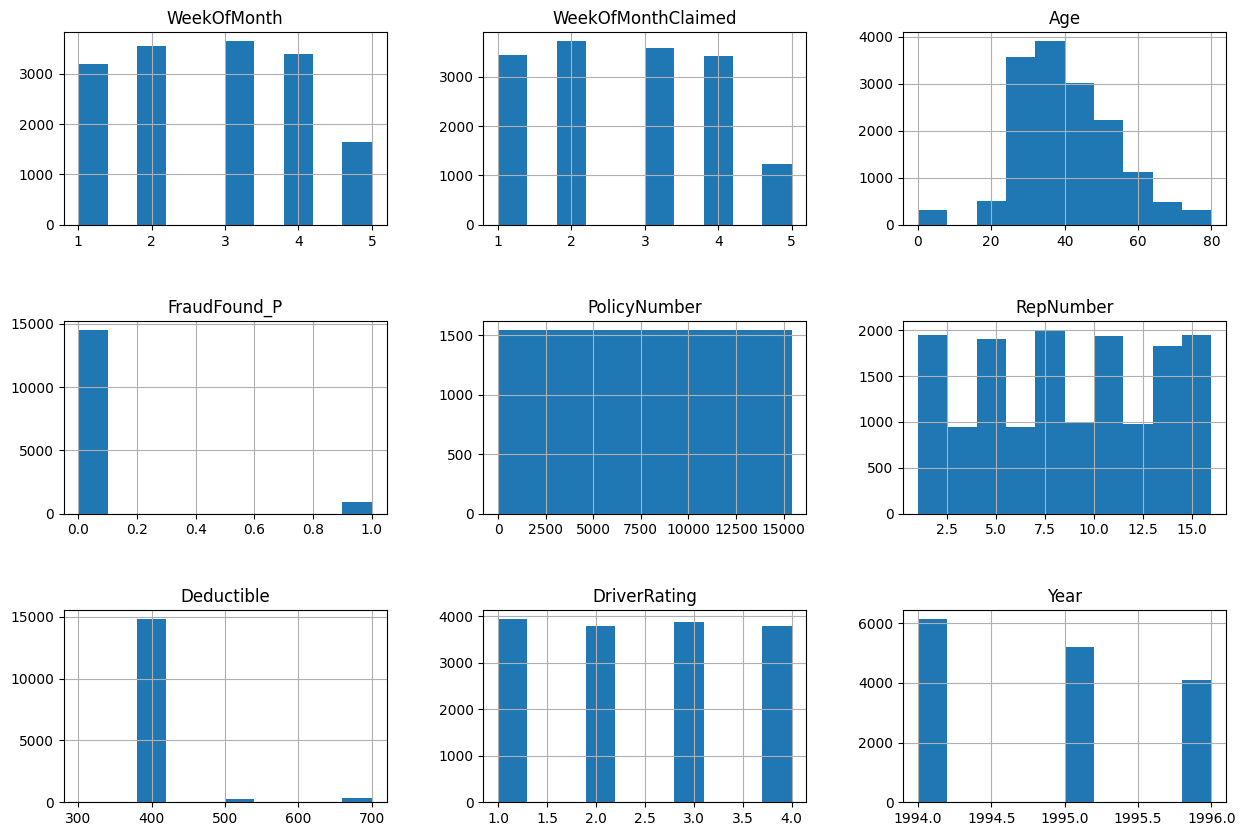

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [ ]:
df['PolicyNumber']

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

PolicyNumber just a row number. So:

In [ ]:
df = df.drop(columns='PolicyNumber')

In [ ]:
item_counts = df['Month'].value_counts(normalize=True)
print("Percentage distribution among months sorted in descending order:")
print(round((item_counts*100), 2))

Percentage distribution among months sorted in descending order:
Jan    9.15
May    8.87
Mar    8.82
Jun    8.57
Oct    8.46
Dec    8.33
Apr    8.30
Feb    8.21
Jul    8.15
Sep    8.04
Nov    7.79
Aug    7.31
Name: Month, dtype: float64


In [ ]:
df['Make'].value_counts()

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

In [ ]:
#Reframing the order of months' names
df['MonthName'] = pd.Categorical(df['Month'], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Fraud/No Fraud distributions:

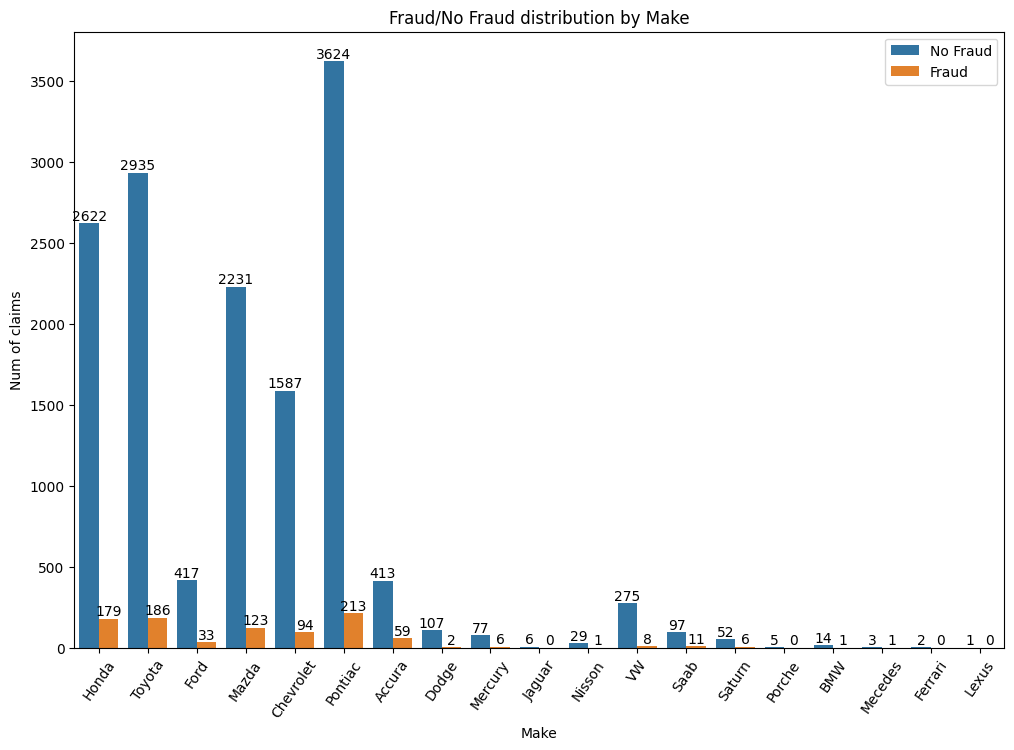

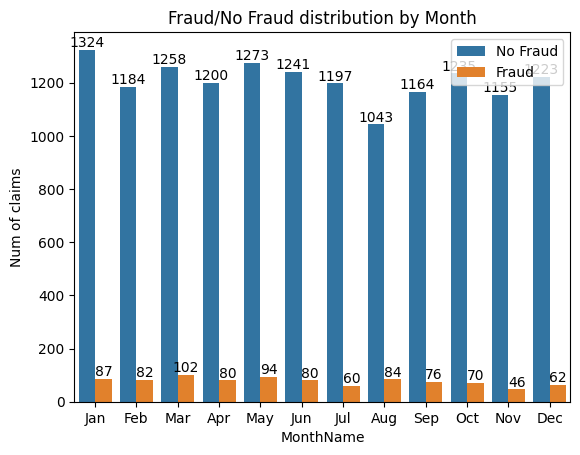

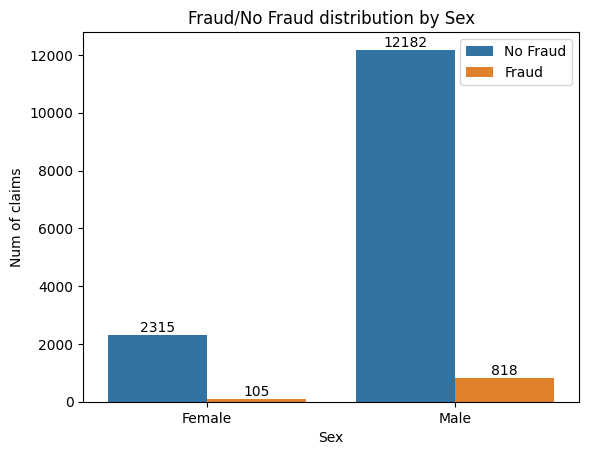

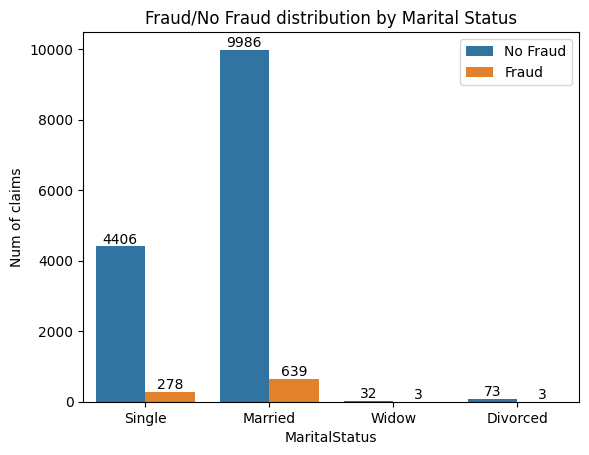

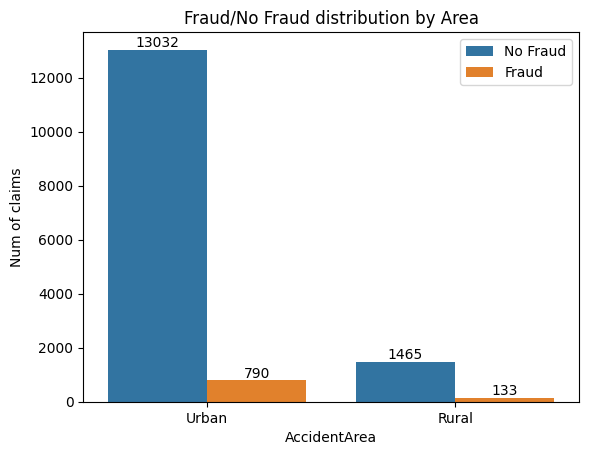

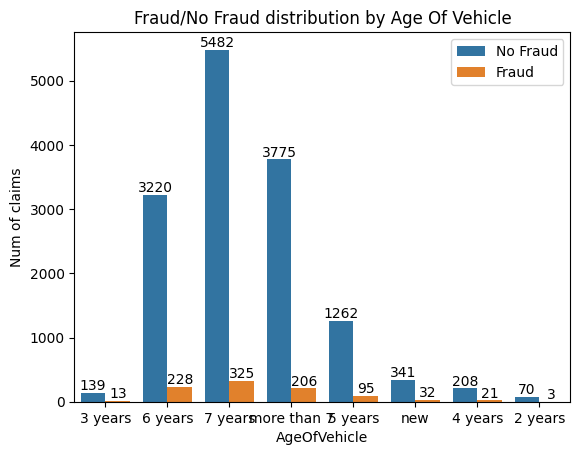

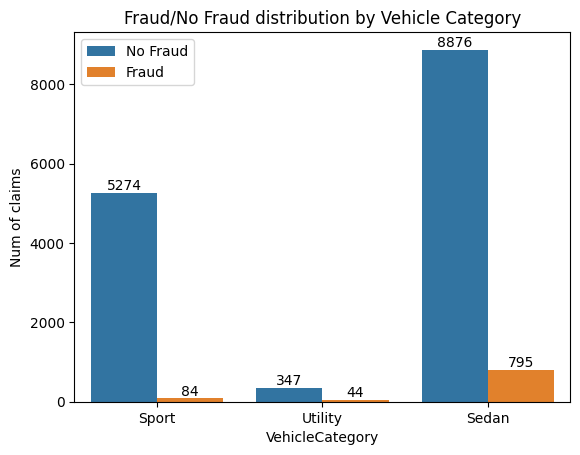

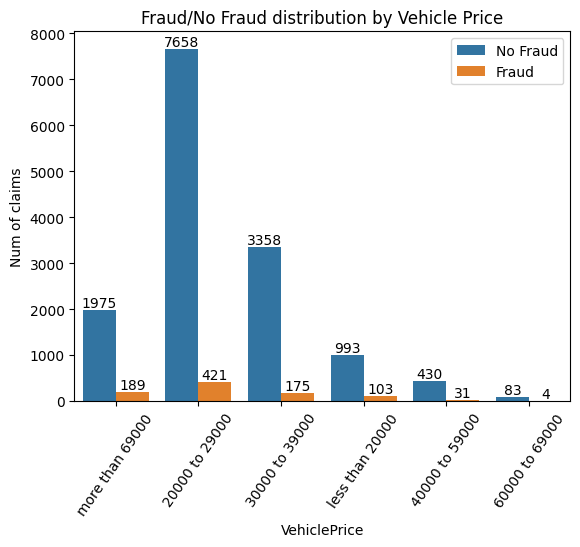

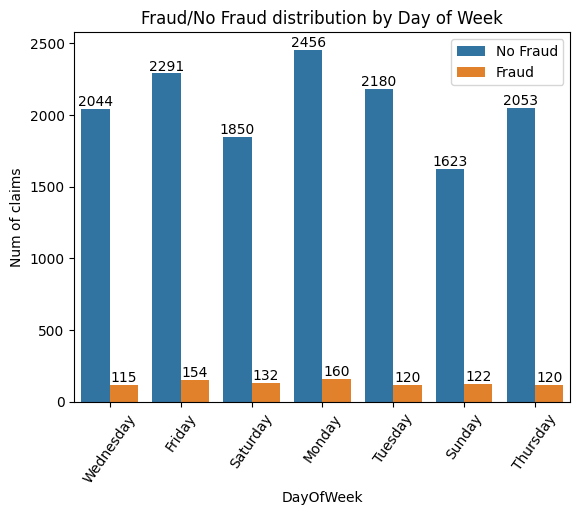

In [ ]:
plt.figure(figsize=(12, 8))
labels = ['No Fraud', 'Fraud']

fig = sns.countplot(x='Make', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.xticks(rotation = 55)
plt.title('Fraud/No Fraud distribution by Make')

plt.ylabel('Num of claims')
plt.show()



fig = sns.countplot(x='MonthName', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Month')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='Sex', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Sex')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='MaritalStatus', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Marital Status')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='AccidentArea', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='AgeOfVehicle', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Age Of Vehicle')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='VehicleCategory', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Vehicle Category')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='VehiclePrice', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.xticks(rotation = 55)
plt.title('Fraud/No Fraud distribution by Vehicle Price')

plt.ylabel('Num of claims')
plt.show()


fig = sns.countplot(x='DayOfWeek', hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.xticks(rotation = 55)
plt.title('Fraud/No Fraud distribution by Day of Week')

plt.ylabel('Num of claims')
plt.show()




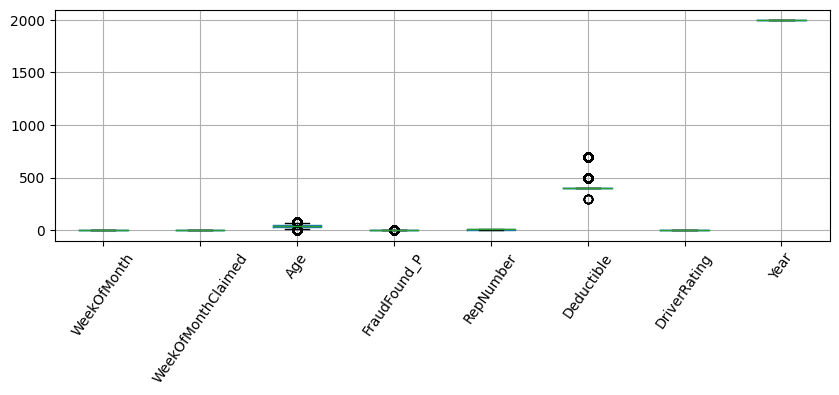

In [ ]:
df.boxplot(figsize=(10,3))
plt.xticks(rotation = 55)
plt.show()

<Axes: >

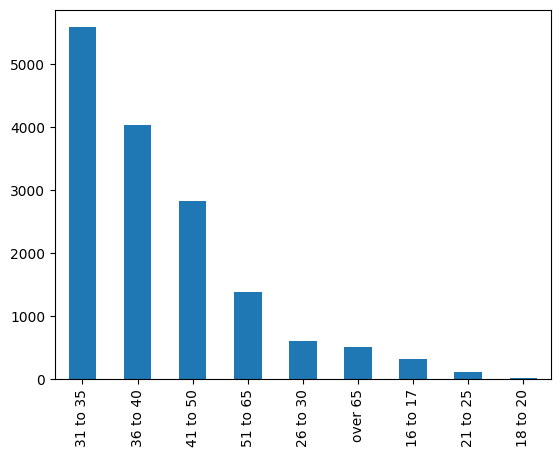

In [ ]:
df.AgeOfPolicyHolder.value_counts().plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='count'>

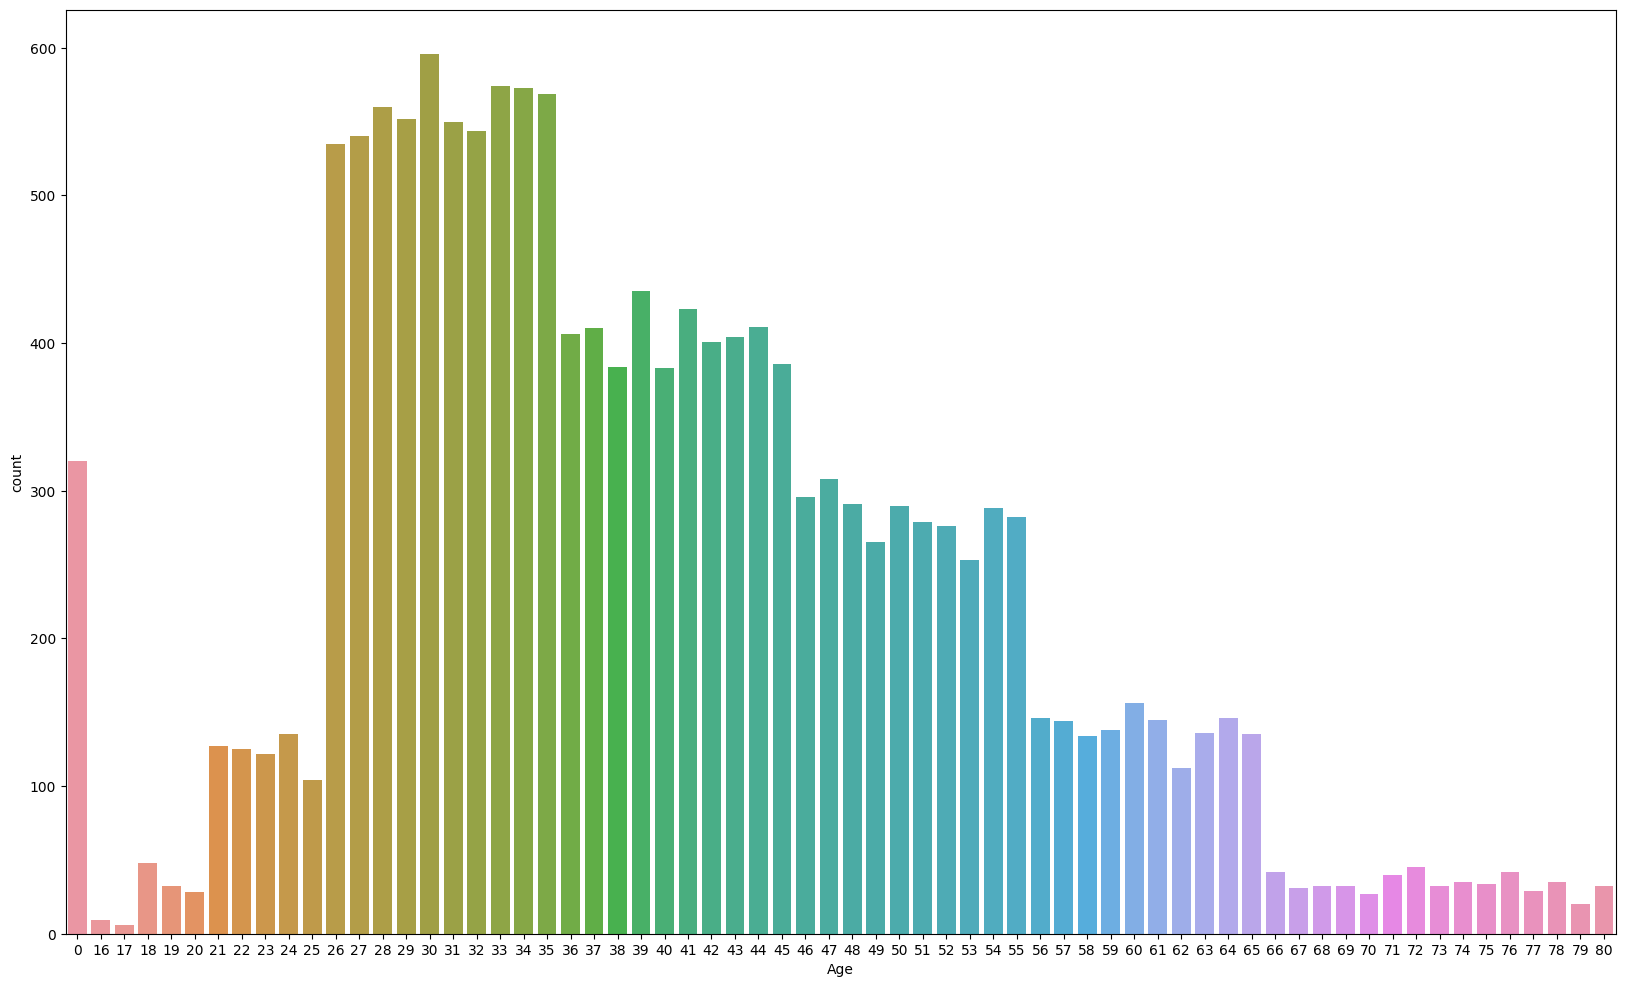

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x = 'Age', data = df)

There are more than 300 zero years old drivers!! Also there is a dizzying growth after the age 25.

Let's check if there are any other nonsense values :)

In [ ]:
for column in df:
  print(column)
  print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

DayOfWeekClaimed and MonthClaimed contain '0' . Nonsense!

Also, PolicyType appears to be a concatenation of VehicleCategory and BasePolicy.

In [ ]:
# Check DayOfWeekClaimed == 0
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,MonthName
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Jul


MonthClaimed == 0 is in the same row! So let's drop the row:


In [ ]:
df = df[~(df['DayOfWeekClaimed']=='0')]

In [ ]:
df.shape

(15419, 32)

In [ ]:
print(df[df['Age']==0].shape)

(319, 33)


There are 319 data with the age 0.
Let's check Age == 0 apears in what intervals of AgeOfPolicyHolder:

In [ ]:
df[df['Age']==0]['AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

Since the row with Age == 0, only appear in row with AgeOfPolicyHolder == '16 to 17', we assign age 0 to 16.5:

In [ ]:
df['Age'] =df['Age'].replace({0:16.5})

**Encoding:**

In [ ]:
object_type_feature = []

for features in df.columns:
    if df[features].dtype == 'O':
       object_type_feature.append(features)

print(object_type_feature)

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [ ]:
df['Month'] = df['Month'].replace({
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
})

df['DayOfWeek'] = df['DayOfWeek'].replace({
    'Monday' : 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday':6
})

df['Make'] = df[['Make']].replace({
    'Lexus': 0,
    'Ferrari': 1, 
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,            
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })   

df['AccidentArea'] = df['AccidentArea'].replace( {
    'Rural' : 0,
    'Urban' : 1
    })


df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })

df['MonthClaimed'] = df['MonthClaimed'].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })

df['Sex'] = df['Sex'].replace( {
    'Female' : 0,
    'Male' : 1
    })
    

df['MaritalStatus'] = df['MaritalStatus'].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,    
    'Married' : 3
    })


df['Fault'] = df['Fault'].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })

df['PolicyType'] = df['PolicyType'].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


df['VehicleCategory'] = df['VehicleCategory'].replace( {
    'Utility' : 0,
    'Sport' : 1, 
    'Sedan' : 2
    })

df['VehiclePrice'] = df['VehiclePrice'].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })  
  

df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })

df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace( {
    'none' : 0,
    '8 to 15' : 1,
    '15 to 30' : 2,
    'more than 30' : 3
    })


df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })

df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7
    })

df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace({
    '16 to 17' : 0,
    '18 to 20' : 1,  
    '21 to 25' : 2,
    '26 to 30' : 3,
    '31 to 35' : 4,
    '36 to 40' : 5,
    '41 to 50' : 6,
    '51 to 65' : 7, 
    'over 65' : 8
    })

df['PoliceReportFiled'] = df['PoliceReportFiled'].replace({
    'Yes' : 0,
    'No' : 1
    })


df['WitnessPresent'] = df['WitnessPresent'].replace({
    'Yes' : 0,
    'No' : 1
    })


df['AgentType'] = df['AgentType'].replace({
    'Internal' : 0,
    'External' : 1
    })


df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })


df['AddressChange_Claim'] = df['AddressChange_Claim'].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })

df['NumberOfCars'] = df['NumberOfCars'].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })


df['BasePolicy'] = df['BasePolicy'].replace({
    'All Perils' : 0, 
    'Liability' : 1,
    'Collision' : 2 
    })


In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,11,5,2,16,1,1,0,1,0,2,...,2,3,1,1,1,0,2,2,1994,1
1,0,3,2,16,1,0,0,4,1,2,...,5,4,0,1,1,0,0,0,1994,2
2,9,5,4,16,1,3,10,2,1,3,...,6,6,1,1,1,0,0,0,1994,2
3,5,2,5,17,0,4,6,1,1,3,...,7,7,0,1,1,3,0,0,1994,1
4,0,5,0,16,1,1,1,2,0,2,...,4,4,1,1,1,0,0,0,1994,2


In [ ]:
df = df.drop(columns='MonthName')

In [ ]:
class_0 = df[df['FraudFound_P'] == 0]
class_1 = df[df['FraudFound_P'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (14496, 32)
class 1: (923, 32)


# Data Prepration and Normalization

In [ ]:
X = df.drop(columns = 'FraudFound_P', axis = 1)
y = df['FraudFound_P'] # target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)
X_train.shape, X_test.shape

((10793, 31), (4626, 31))

In [ ]:
y_train.value_counts()

0    10147
1      646
Name: FraudFound_P, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

The test accuracy is:  0.9401210549070471 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4349
           1       0.00      0.00      0.00       277

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626

Confusion matrix :
 [[4349    0]
 [ 277    0]] 



<Axes: >

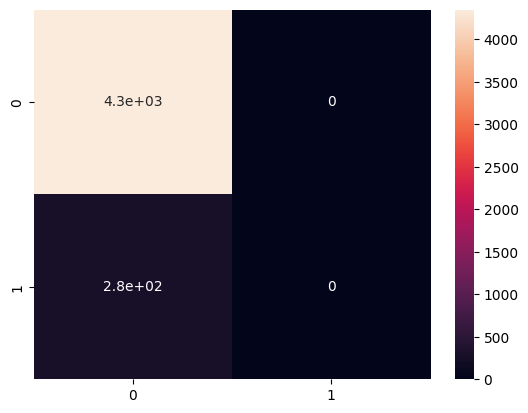

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression() 
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_lr), '\n')
print('classification report :\n', classification_report(y_test, y_pred_lr))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_lr), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)


We have imbalanced classes.

# SVM

The test accuracy is:  0.9401210549070471 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4349
           1       0.00      0.00      0.00       277

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626

Confusion matrix :
 [[4349    0]
 [ 277    0]] 



<Axes: >

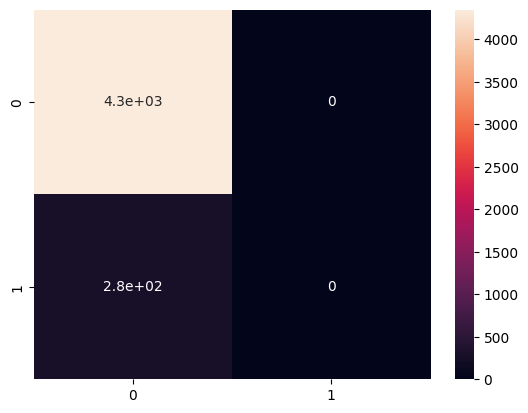

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_svm), '\n')
print('classification report :\n', classification_report(y_test, y_pred_svm))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_svm), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True)

# Decision-Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_dt), '\n')
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_dt), '\n')
print('classification report :\n', classification_report(y_test, y_pred_dt))

The test accuracy is:  0.8927799394725465 

Confusion matrix :
 [[4066  283]
 [ 213   64]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4349
           1       0.18      0.23      0.21       277

    accuracy                           0.89      4626
   macro avg       0.57      0.58      0.57      4626
weighted avg       0.90      0.89      0.90      4626



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_rf), '\n')
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_rf), '\n')
print('classification report :\n', classification_report(y_test, y_pred_rf))

The test accuracy is:  0.9399048854301773 

Confusion matrix :
 [[4346    3]
 [ 275    2]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4349
           1       0.40      0.01      0.01       277

    accuracy                           0.94      4626
   macro avg       0.67      0.50      0.49      4626
weighted avg       0.91      0.94      0.91      4626



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_knn), '\n')
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_knn), '\n')
print('classification report :\n', classification_report(y_test, y_pred_knn))

The test accuracy is:  0.9360138348465197 

Confusion matrix :
 [[4319   30]
 [ 266   11]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      4349
           1       0.27      0.04      0.07       277

    accuracy                           0.94      4626
   macro avg       0.61      0.52      0.52      4626
weighted avg       0.90      0.94      0.91      4626



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_nb), '\n')
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_nb), '\n')
print('classification report :\n', classification_report(y_test, y_pred_nb))

The test accuracy is:  0.8540856031128404 

Confusion matrix :
 [[3886  463]
 [ 212   65]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      4349
           1       0.12      0.23      0.16       277

    accuracy                           0.85      4626
   macro avg       0.54      0.56      0.54      4626
weighted avg       0.90      0.85      0.87      4626



# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bag = BaggingClassifier()
model_bag.fit(X_train, y_train)

y_pred_bag = model_bag.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_bag), '\n')
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_bag), '\n')
print('classification report :\n', classification_report(y_test, y_pred_bag))

The test accuracy is:  0.9394725464764375 

Confusion matrix :
 [[4323   26]
 [ 254   23]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      4349
           1       0.47      0.08      0.14       277

    accuracy                           0.94      4626
   macro avg       0.71      0.54      0.55      4626
weighted avg       0.92      0.94      0.92      4626



# Stratified Cross-Validation 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

skf = StratifiedKFold(shuffle=True, random_state=42)

In [ ]:
#Logistic Regression

lst_accu_stratified_lr = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_lr.fit(x_train_fold, y_train_fold)
    y_pred_lr_with_skf = model_lr.predict(x_test_fold)

    lst_accu_stratified_lr.append(accuracy_score(y_test_fold, y_pred_lr_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_lr_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_lr_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_lr)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_lr)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2897    3]
 [ 184    0]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2900
           1       0.00      0.00      0.00       184

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2896    3]
 [ 185    0]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2897    2]
 [ 185   

In [ ]:
#SVM

lst_accu_stratified_svm = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_svm.fit(x_train_fold, y_train_fold)
    y_pred_svm_with_skf = model_svm.predict(x_test_fold)

    lst_accu_stratified_svm.append(accuracy_score(y_test_fold, y_pred_svm_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_svm_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_svm_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_svm)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_svm)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2900    0]
 [ 184    0]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2900
           1       0.00      0.00      0.00       184

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2899    0]
 [ 185    0]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2899    0]
 [ 185   

In [ ]:
#Decision-Trees

lst_accu_stratified_dt = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_dt.fit(x_train_fold, y_train_fold)
    y_pred_dt_with_skf = model_dt.predict(x_test_fold)

    lst_accu_stratified_dt.append(accuracy_score(y_test_fold, y_pred_dt_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_dt_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_dt_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_dt)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_dt)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2713  187]
 [ 141   43]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2900
           1       0.19      0.23      0.21       184

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.58      3084
weighted avg       0.91      0.89      0.90      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2720  179]
 [ 141   44]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2899
           1       0.20      0.24      0.22       185

    accuracy                           0.90      3084
   macro avg       0.57      0.59      0.58      3084
weighted avg       0.91      0.90      0.90      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2696  203]
 [ 152   

In [ ]:
#Random Forest

lst_accu_stratified_rf = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_rf.fit(x_train_fold, y_train_fold)
    y_pred_rf_with_skf = model_rf.predict(x_test_fold)

    lst_accu_stratified_rf.append(accuracy_score(y_test_fold, y_pred_rf_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_rf_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_rf_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_rf)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_rf)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2900    0]
 [ 182    2]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2900
           1       1.00      0.01      0.02       184

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2898    1]
 [ 184    1]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.50      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.72      0.50      0.49      3084
weighted avg       0.91      0.94      0.91      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2899    0]
 [ 183   

In [ ]:
#KNN

lst_accu_stratified_knn = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_knn.fit(x_train_fold, y_train_fold)
    y_pred_knn_with_skf = model_knn.predict(x_test_fold)

    lst_accu_stratified_knn.append(accuracy_score(y_test_fold, y_pred_knn_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_knn_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_knn_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_knn)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_knn)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2882   18]
 [ 179    5]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2900
           1       0.22      0.03      0.05       184

    accuracy                           0.94      3084
   macro avg       0.58      0.51      0.51      3084
weighted avg       0.90      0.94      0.91      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2883   16]
 [ 177    8]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.33      0.04      0.08       185

    accuracy                           0.94      3084
   macro avg       0.64      0.52      0.52      3084
weighted avg       0.91      0.94      0.91      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2879   20]
 [ 182   

In [ ]:
#Naive Bayes

lst_accu_stratified_nb = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_nb.fit(x_train_fold, y_train_fold)
    y_pred_nb_with_skf = model_nb.predict(x_test_fold)

    lst_accu_stratified_nb.append(accuracy_score(y_test_fold, y_pred_nb_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_nb_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_nb_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_nb)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_nb)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2621  279]
 [ 149   35]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2900
           1       0.11      0.19      0.14       184

    accuracy                           0.86      3084
   macro avg       0.53      0.55      0.53      3084
weighted avg       0.90      0.86      0.88      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2668  231]
 [ 151   34]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2899
           1       0.13      0.18      0.15       185

    accuracy                           0.88      3084
   macro avg       0.54      0.55      0.54      3084
weighted avg       0.90      0.88      0.89      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2649  250]
 [ 152   

In [ ]:
#Bagging

lst_accu_stratified_bag = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    x_train_fold = sc.fit_transform(x_train_fold)
    x_test_fold = sc.transform(x_test_fold)

    model_bag.fit(x_train_fold, y_train_fold)
    y_pred_bag_with_skf = model_bag.predict(x_test_fold)

    lst_accu_stratified_bag.append(accuracy_score(y_test_fold, y_pred_bag_with_skf))

    print('Fold #', i+1, ':\n')
    print('Confusion matrix :\n', confusion_matrix(y_test_fold, y_pred_bag_with_skf), '\n')
    print('classification report :\n', classification_report(y_test_fold, y_pred_bag_with_skf))
    print('###########################################################')


print('\nList of possible accuracy in 5 fold:', lst_accu_stratified_bag)
print('\nOverall Accuracy:',
      round(mean(lst_accu_stratified_bag)*100, 2), '%')

Fold # 1 :

Confusion matrix :
 [[2882   18]
 [ 167   17]] 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2900
           1       0.49      0.09      0.16       184

    accuracy                           0.94      3084
   macro avg       0.72      0.54      0.56      3084
weighted avg       0.92      0.94      0.92      3084

###########################################################
Fold # 2 :

Confusion matrix :
 [[2890    9]
 [ 174   11]] 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.55      0.06      0.11       185

    accuracy                           0.94      3084
   macro avg       0.75      0.53      0.54      3084
weighted avg       0.92      0.94      0.92      3084

###########################################################
Fold # 3 :

Confusion matrix :
 [[2888   11]
 [ 177   

# Imbalanced Data

According to the performance metrics of the above classification models including recall, precision, f1_score and confusion matrix, we have imbalanced classes. Thus the dataset is imbalanced. In fact, the dataset is likely imbalanced if the performance is significantly better on one class than the other. As we observed in the results, the performances of all models are better on class 0 (Not Fraud) than class 1 (Fraud).

Now let's overcome the issue!



*   OverSampling




In [ ]:
from imblearn.over_sampling import SMOTEN

smt = SMOTEN(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smt.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

0    14496
1    14496
Name: FraudFound_P, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, 
                                                    random_state=42,stratify=y_resampled)

The test accuracy is:  0.7589239524055872 

classification report :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      2900
           1       0.75      0.78      0.76      2899

    accuracy                           0.76      5799
   macro avg       0.76      0.76      0.76      5799
weighted avg       0.76      0.76      0.76      5799

Confusion matrix :
 [[2149  751]
 [ 647 2252]] 



<Axes: >

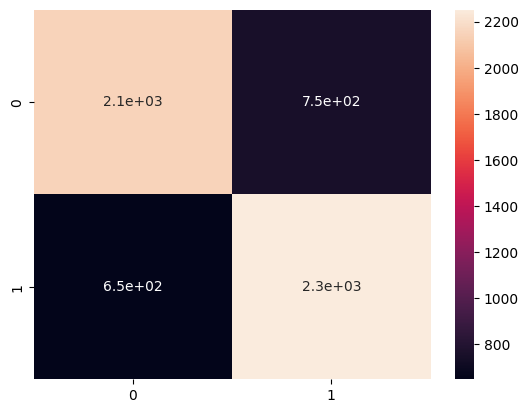

In [ ]:
#Logistic Regression

model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)

y_pred_lr_over = model_lr.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_lr_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_lr_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_lr_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_lr_over), annot=True)


Now there is a balance between performance of model on class 0 and class 1. Let's check other models:

The test accuracy is:  0.6418347991032937 

classification report :
               precision    recall  f1-score   support

           0       0.78      0.40      0.53      2900
           1       0.60      0.89      0.71      2899

    accuracy                           0.64      5799
   macro avg       0.69      0.64      0.62      5799
weighted avg       0.69      0.64      0.62      5799

Confusion matrix :
 [[1156 1744]
 [ 333 2566]] 



<Axes: >

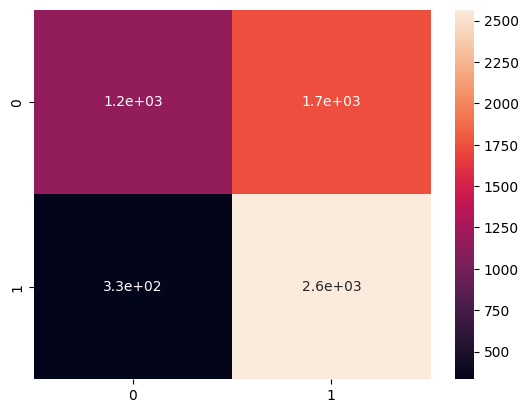

In [ ]:
#SVM

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm_over = model_svm.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_svm_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_svm_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_svm_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_svm_over), annot=True)

The test accuracy is:  0.936713226418348 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2900
           1       0.92      0.96      0.94      2899

    accuracy                           0.94      5799
   macro avg       0.94      0.94      0.94      5799
weighted avg       0.94      0.94      0.94      5799

Confusion matrix :
 [[2659  241]
 [ 126 2773]] 



<Axes: >

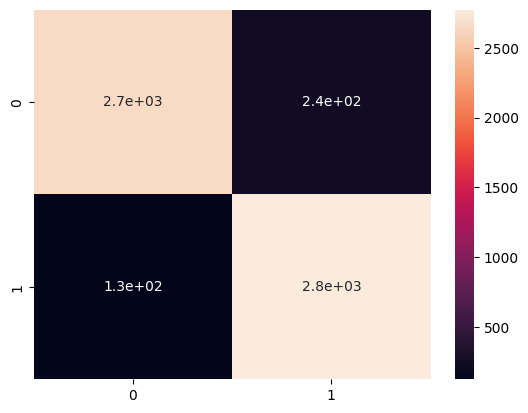

In [ ]:
#Decision Trees

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt_over = model_dt.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_dt_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_dt_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_dt_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_dt_over), annot=True)

The test accuracy is:  0.9665459561993447 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2900
           1       0.99      0.95      0.97      2899

    accuracy                           0.97      5799
   macro avg       0.97      0.97      0.97      5799
weighted avg       0.97      0.97      0.97      5799

Confusion matrix :
 [[2864   36]
 [ 158 2741]] 



<Axes: >

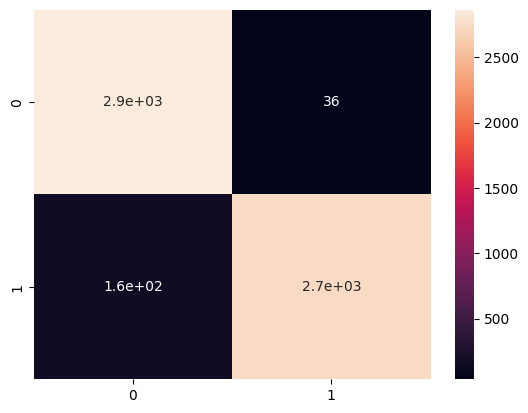

In [ ]:
#Random Forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf_over = model_rf.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_rf_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_rf_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_rf_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_rf_over), annot=True)

The test accuracy is:  0.9111915847559924 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      2900
           1       0.88      0.96      0.92      2899

    accuracy                           0.91      5799
   macro avg       0.91      0.91      0.91      5799
weighted avg       0.91      0.91      0.91      5799

Confusion matrix :
 [[2512  388]
 [ 127 2772]] 



<Axes: >

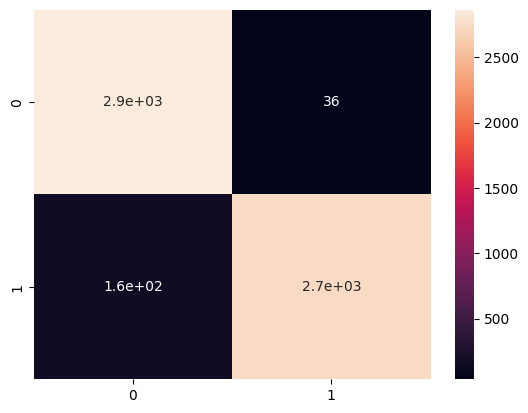

In [ ]:
#KNN

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn_over = model_knn.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_knn_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_knn_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_knn_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_rf_over), annot=True)

The test accuracy is:  0.6823590274185204 

classification report :
               precision    recall  f1-score   support

           0       0.87      0.43      0.57      2900
           1       0.62      0.94      0.75      2899

    accuracy                           0.68      5799
   macro avg       0.75      0.68      0.66      5799
weighted avg       0.75      0.68      0.66      5799

Confusion matrix :
 [[1238 1662]
 [ 180 2719]] 



<Axes: >

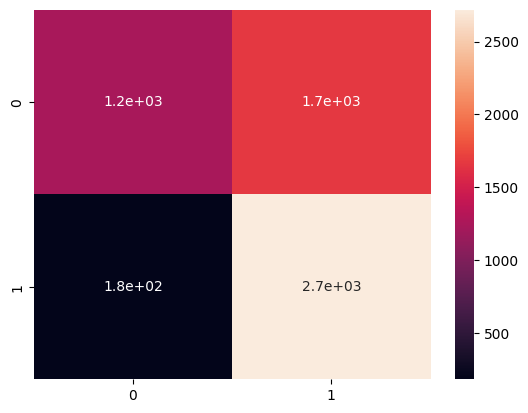

In [ ]:
#Naive Bayes

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb_over = model_nb.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_nb_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_nb_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_nb_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_nb_over), annot=True)

The test accuracy is:  0.9612002069322297 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2900
           1       0.97      0.95      0.96      2899

    accuracy                           0.96      5799
   macro avg       0.96      0.96      0.96      5799
weighted avg       0.96      0.96      0.96      5799

Confusion matrix :
 [[2812   88]
 [ 137 2762]] 



<Axes: >

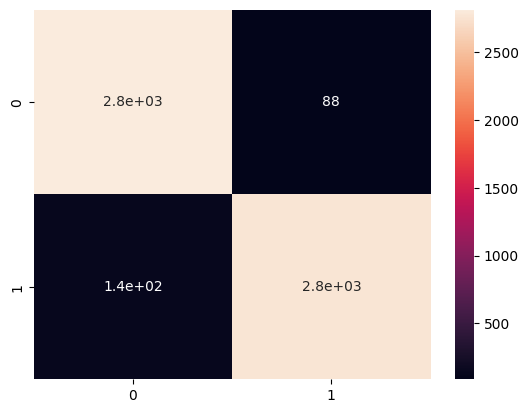

In [ ]:
#Bagging

model_bag = BaggingClassifier()
model_bag.fit(X_train, y_train)

y_pred_bag_over = model_bag.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_bag_over), '\n')
print('classification report :\n', classification_report(y_test, y_pred_bag_over))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_bag_over), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_bag_over), annot=True)



*   UnderSampling


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)


In [ ]:
y_resampled_under.value_counts()

0    923
1    923
Name: FraudFound_P, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_under, y_resampled_under, test_size=0.2, 
                                                    random_state=42,stratify=y_resampled_under)

The test accuracy is:  0.7054054054054054 

classification report :
               precision    recall  f1-score   support

           0       0.75      0.62      0.68       185
           1       0.68      0.79      0.73       185

    accuracy                           0.71       370
   macro avg       0.71      0.71      0.70       370
weighted avg       0.71      0.71      0.70       370

Confusion matrix :
 [[115  70]
 [ 39 146]] 



<Axes: >

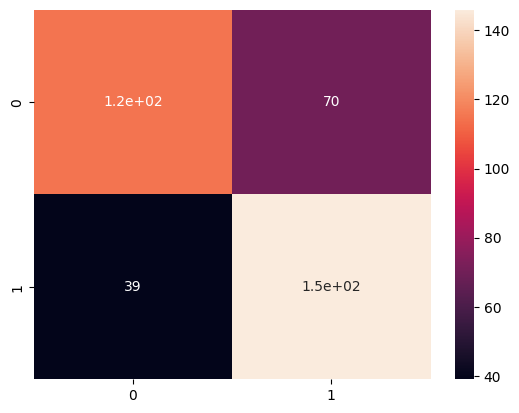

In [ ]:
#Logistic Regression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr_under = model_lr.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_lr_under), '\n')
print('classification report :\n', classification_report(y_test, y_pred_lr_under))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_lr_under), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_lr_under), annot=True)

The test accuracy is:  0.5027027027027027 

classification report :
               precision    recall  f1-score   support

           0       0.52      0.09      0.16       185
           1       0.50      0.91      0.65       185

    accuracy                           0.50       370
   macro avg       0.51      0.50      0.40       370
weighted avg       0.51      0.50      0.40       370

Confusion matrix :
 [[ 17 168]
 [ 16 169]] 



<Axes: >

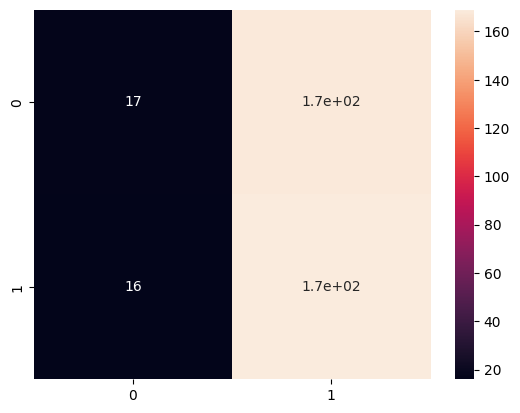

In [ ]:
#SVM

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm_under = model_svm.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_svm_under), '\n')
print('classification report :\n', classification_report(y_test, y_pred_svm_under))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_svm_under), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_svm_under), annot=True)

The test accuracy is:  0.6621621621621622 

classification report :
               precision    recall  f1-score   support

           0       0.66      0.67      0.66       185
           1       0.66      0.65      0.66       185

    accuracy                           0.66       370
   macro avg       0.66      0.66      0.66       370
weighted avg       0.66      0.66      0.66       370

Confusion matrix :
 [[124  61]
 [ 64 121]] 



<Axes: >

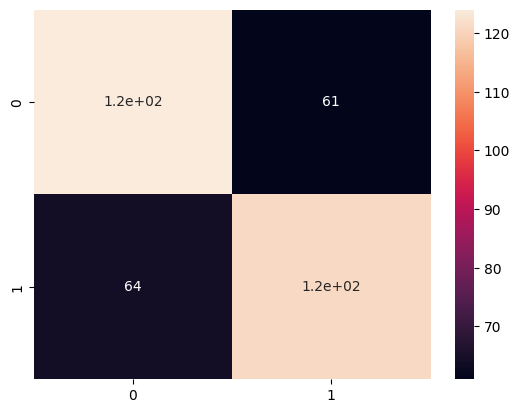

In [ ]:
#Decision Trees

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt_under = model_dt.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_dt_under), '\n')
print('classification report :\n', classification_report(y_test, y_pred_dt_under))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_dt_under), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_dt_under), annot=True)

The test accuracy is:  0.7756756756756756 

classification report :
               precision    recall  f1-score   support

           0       0.85      0.66      0.75       185
           1       0.73      0.89      0.80       185

    accuracy                           0.78       370
   macro avg       0.79      0.78      0.77       370
weighted avg       0.79      0.78      0.77       370

Confusion matrix :
 [[123  62]
 [ 21 164]] 



<Axes: >

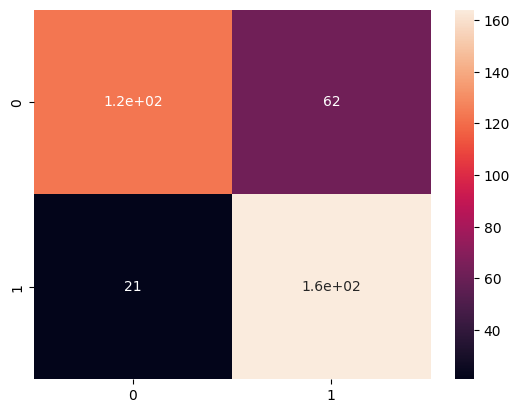

In [ ]:
#Random Forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf_under = model_rf.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred_rf_under), '\n')
print('classification report :\n', classification_report(y_test, y_pred_rf_under))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred_rf_under), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred_rf_under), annot=True)

# Weighted_Based

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)


In [ ]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(
                                                                        class_weight='balanced',
                                                                        classes= np.unique(y_train), 
                                                                        y = y_train)))
class_weights

{0: 0.5318185737690783, 1: 8.357046070460704}

The test accuracy is:  0.6472114137483788 

classification report :
               precision    recall  f1-score   support

           0       0.96      0.65      0.78      2899
           1       0.10      0.63      0.18       185

    accuracy                           0.65      3084
   macro avg       0.53      0.64      0.48      3084
weighted avg       0.91      0.65      0.74      3084

Confusion matrix :
 [[1880 1019]
 [  69  116]] 



<Axes: >

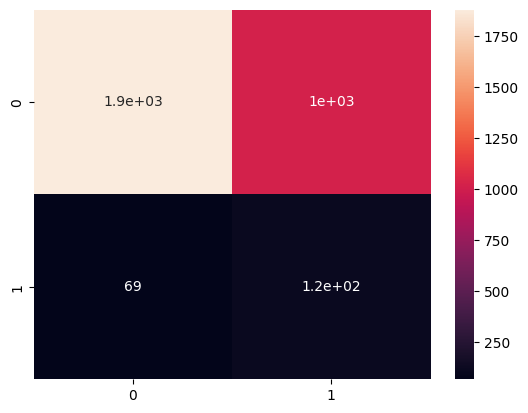

In [ ]:
#Logistic Regression 

model1 = LogisticRegression(class_weight=class_weights)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

The test accuracy is:  0.9189364461738002 

classification report :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2899
           1       0.03      0.01      0.02       185

    accuracy                           0.92      3084
   macro avg       0.48      0.49      0.49      3084
weighted avg       0.88      0.92      0.90      3084

Confusion matrix :
 [[2832   67]
 [ 183    2]] 



<Axes: >

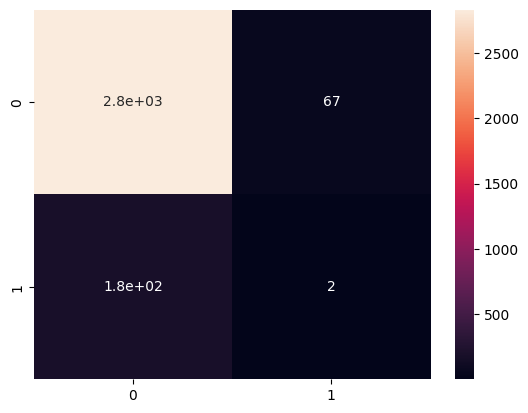

In [ ]:
#SVM

model2 = SVC(class_weight=class_weights)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

The test accuracy is:  0.8991569390402075 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2899
           1       0.17      0.18      0.18       185

    accuracy                           0.90      3084
   macro avg       0.56      0.56      0.56      3084
weighted avg       0.90      0.90      0.90      3084

Confusion matrix :
 [[2740  159]
 [ 152   33]] 



<Axes: >

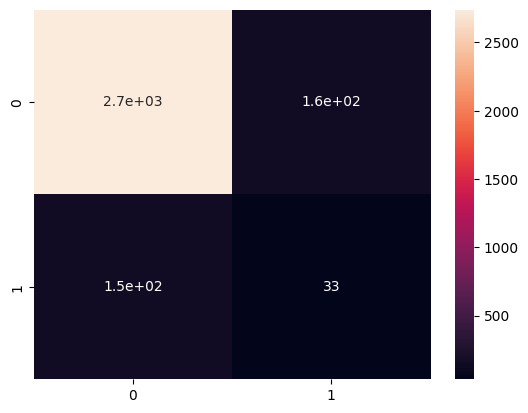

In [ ]:
#Decision Trees

model3 = DecisionTreeClassifier(class_weight=class_weights)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

The test accuracy is:  0.940337224383917 

classification report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084

Confusion matrix :
 [[2899    0]
 [ 184    1]] 



<Axes: >

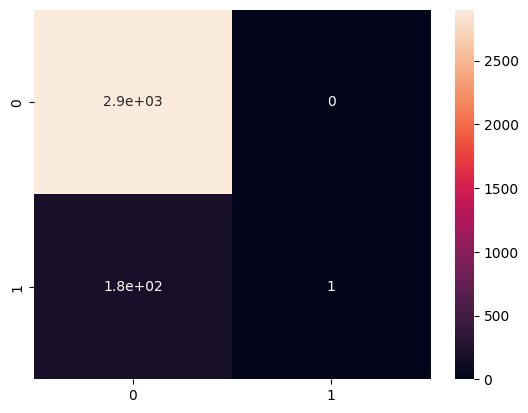

In [ ]:
#Random Forest

model4 = RandomForestClassifier(class_weight=class_weights)
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Apperentaly weighted method does not work well :)

# Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, 
                                                    random_state=42,stratify=y_resampled)

The test accuracy is:  0.9575788929125711 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2900
           1       0.97      0.95      0.96      2899

    accuracy                           0.96      5799
   macro avg       0.96      0.96      0.96      5799
weighted avg       0.96      0.96      0.96      5799

Confusion matrix :
 [[2801   99]
 [ 147 2752]] 



<Axes: >

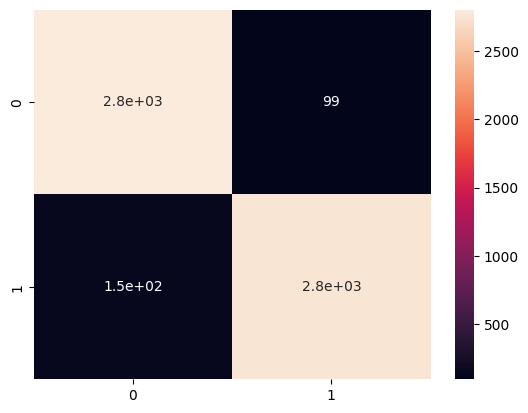

In [ ]:
#SVM

from sklearn.model_selection import GridSearchCV

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

boosted_svm = SVC(class_weight='balanced', random_state=42)
svm_grid_search = GridSearchCV(boosted_svm, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

y_pred = svm_grid_search.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Nice improvement! Took a loooong time though :)

In [ ]:
svm_grid_search.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

The test accuracy is:  0.9660286256251078 

classification report :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      2900
           1       0.98      0.95      0.97      2899

    accuracy                           0.97      5799
   macro avg       0.97      0.97      0.97      5799
weighted avg       0.97      0.97      0.97      5799

Confusion matrix :
 [[2856   44]
 [ 153 2746]] 



<Axes: >

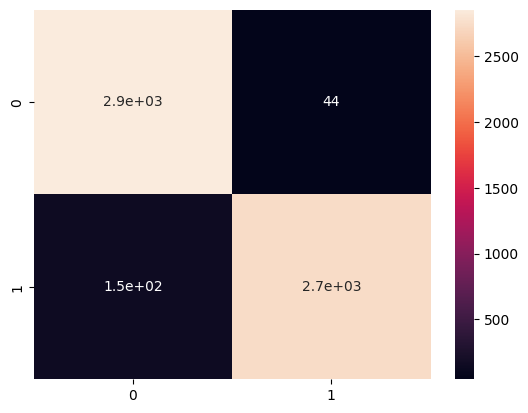

In [ ]:
#Random Forest

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

boosted_rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(boosted_rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

y_pred = rf_grid_search.predict(X_test)

print('The test accuracy is: ', accuracy_score(y_test, y_pred), '\n')
print('classification report :\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred), '\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
rf_grid_search.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}